In [1]:
import matplotlib.pyplot as plt
import sys
from numpy import pi
import numpy as np
sys.path.append('../')
import rcwa

In [18]:
nG = 101
# lattice vector
Lx = .1
Ly = .1
L1 = [Lx,0.]
L2 = [0.,Ly]

# frequency and angles
freq = 1.
theta = pi/4
phi = 0.

# now consider three layers: vacuum + patterned + vacuum
epsuniform1 = 1.
epsuniform3 = 1.
thick1 = 1.
thick2 = 1.
thick3 = 1.

# for patterned layer, eps = epsbkg + dof * epsdiff
epsbkg = 1.
epsdiff = 11.

# discretization for patterend layer
Nx = 1500
Ny = 1500

# setup RCWA
obj = rcwa.RCWA_obj(nG,L1,L2,freq,theta,phi)
obj.Add_LayerUniform(thick1,epsuniform1)
obj.Add_LayerGrid(thick2,epsdiff,epsbkg,Nx,Ny)
obj.Add_LayerUniform(thick3,epsuniform3)
obj.Init_Setup(Gmethod=0)

Total nG =  101


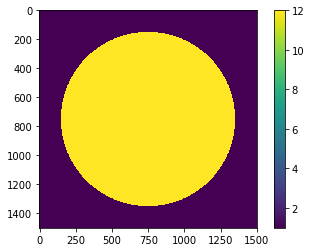

In [23]:
# let's setup a cylinder grid, and here we plot eps_patterend to double check

dof = np.zeros((Nx,Ny))
radius = 0.04
x0 = np.linspace(0,Lx,Nx)
y0 = np.linspace(0,Ly,Ny)
x, y = np.meshgrid(x0,y0,indexing='ij')
sphere = (x-.5*Lx)**2+(y-.5*Ly)**2<radius**2
dof[sphere]=1
plt.figure();
plt.imshow(dof*epsdiff+epsbkg)
plt.colorbar()
plt.show()

# add DOF to rcwa
obj.GridLayer_getDOF(dof.flatten())

In [24]:
p_amp = 0.
s_amp = 1.
p_phase = 0.
s_phase = 0.

obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0)
R,T = obj.RT_Solve()
# this is merely reflected and transmitted power
# To get the reflection and transmission coefficient, some normalization is needed
print "R=",R,", T=",T

R= 0.12030284352215527 , T= 0.586803937664348
